<a href="https://colab.research.google.com/github/reginaldrhoe/ML604P1/blob/main/Trial_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Classroom/CSE-MB 620 Deep Learning with PyTorch July 2025/Lectures/pretrained models'

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/Classroom/CSE-MB 620 Deep Learning with PyTorch July 2025/Lectures/pretrained models'
/content


In [2]:
import torchvision
from torchvision import models

In [3]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

In [4]:
import requests

# Download a sample image
image_url = "https://pytorch.org/tutorials/_static/img/cat_224x224.jpg"
image_path = "cat.jpg"

response = requests.get(image_url, stream=True)
response.raw.decode_content = True
with open(image_path, 'wb') as f:
    for chunk in response.iter_content(chunk_size=1024):
        f.write(chunk)

print(f"Downloaded image to {image_path}")

Downloaded image to cat.jpg


In [5]:
from PIL import Image
path = 'cat.jpg'
img = Image.open(path)

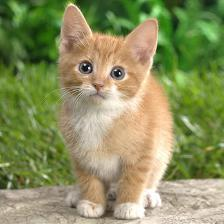

In [6]:
img

In [9]:
img_t = preprocess(img)

In [10]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [11]:
labels_url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
labels_path = "imagenet_classes.txt"

response = requests.get(labels_url, stream=True)
response.raw.decode_content = True
with open(labels_path, 'wb') as f:
    for chunk in response.iter_content(chunk_size=1024):
        f.write(chunk)

print(f"Downloaded labels to {labels_path}")

Downloaded labels to imagenet_classes.txt


In [12]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [14]:
vgg = models.vgg19_bn(weights=models.VGG19_BN_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:08<00:00, 69.3MB/s]


In [15]:
out = vgg(batch_t)

In [16]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
_, indices = torch.sort(out, descending=True)
top5_predictions = [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

print("Top 5 predictions:")
for label, confidence in top5_predictions:
    print(f"{label}: {confidence:.2f}%")

Top 5 predictions:
Chihuahua: 8.00%
sunglasses: 1.96%
sunglass: 1.56%
Australian terrier: 1.33%
muzzle: 1.15%
